In [31]:
%matplotlib nbagg
import pandas as pd
import sqlite3 as sql3
import matplotlib.pyplot as plt
import numpy as np
from epPlots import autolabel

In [3]:
def plotContactDistances():
	# Import df from sqlite
	sqlite_file = 'my_first_db.sqlite'    # name of the sqlite database file
	conn = sql3.connect(sqlite_file)
	c = conn.cursor()
	contactsDf = pd.read_sql_query("select * from AutoEP;", conn)
	conn.commit()
	c.close()
	conn.close()

	contactDistDf = contactsDf["startbpB"].subtract(contactsDf["endbpA"])

	fig, ax = plt.subplots()
	ax.set_xlabel('Contact Interaction Distance')
	ax.set_ylabel('Occurrence Count')
	ax.set_title('Distribution of contact distances in Rao 2014 CH12 cells')

	contactDistDf.plot.hist(bins=24, range=(0,1.2e6)) # I think spread is too wide for this - need to do more manually

	plt.show()

In [98]:
def plotTadJumps():
	# Import df from sqlite
	sqlite_file = 'my_first_db.sqlite'    # name of the sqlite database file
	conn = sql3.connect(sqlite_file)
	c = conn.cursor()
	contactsDf = pd.read_sql_query("select * from AutoEP;", conn)
	conn.commit()
	c.close()
	conn.close()

	splitTadsA = contactsDf['tadA'].str.split(pat='_').str[2]
	splitTadsB = contactsDf['tadB'].str.split(pat='_').str[2]    
	# tadsDf = contactsDf[['tadA', 'tadB']].copy()
    
	numTadA = pd.to_numeric(splitTadsA)
	numTadB = pd.to_numeric(splitTadsB)

	tadDistDf = numTadB.subtract(numTadA)
	print tadDistDf
    
	filtTadDistDf =tadDistDf[(tadDistDf != 0.0) & (tadDistDf != None)]
	print filtTadDistDf
    
	fig, ax = plt.subplots()
	ax.set_xlabel('Tad Count Distance')
	ax.set_ylabel('Occurrence Count')
	ax.set_title('Distribution of inter-tad distances in Rao 2014 CH12 cells')

	filtTadDistDf.plot.hist(bins=10, range=(1,11))


0         0.0
1         0.0
2         NaN
3         NaN
4         0.0
5         0.0
6        65.0
7         NaN
8         0.0
9         NaN
10        NaN
11        NaN
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        NaN
22        NaN
23        0.0
24        NaN
25        NaN
26        0.0
27        0.0
28        0.0
29        NaN
        ...  
3301      0.0
3302      NaN
3303      NaN
3304      0.0
3305      1.0
3306      0.0
3307      8.0
3308      NaN
3309      2.0
3310      0.0
3311      0.0
3312      7.0
3313      NaN
3314    177.0
3315      NaN
3316      0.0
3317      0.0
3318      NaN
3319      0.0
3320      0.0
3321      0.0
3322      0.0
3323      NaN
3324      NaN
3325      7.0
3326      2.0
3327      2.0
3328    185.0
3329      0.0
3330     10.0
Length: 3331, dtype: float64
2         NaN
3         NaN
6        65.0
7         NaN
9         NaN
10        NaN
11        NaN
21        NaN
22   

<IPython.core.display.Javascript object>


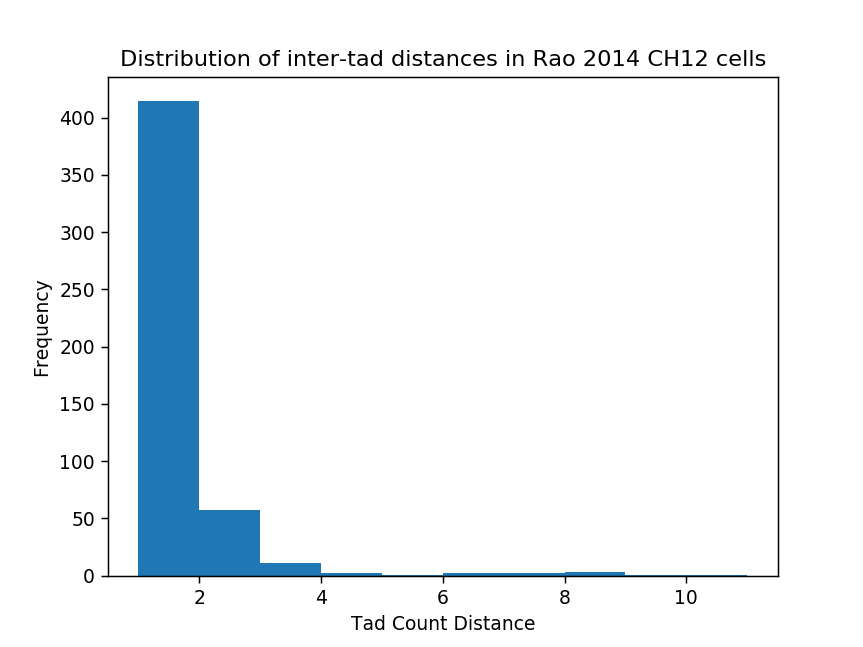

In [99]:
if __name__ == "__main__":
	# recall TAD and reg labeled contacts file
	# plotContactDistances()
	plotTadJumps()